In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from pylatexenc.latex2text import LatexNodes2Text

data = pd.read_csv('./data/train.csv')

In [13]:
data.head()

,QuestionId,ConstructId,ConstructName,SubjectId,SubjectName,CorrectAnswer,QuestionText,AnswerAText,AnswerBText,AnswerCText,AnswerDText,MisconceptionAId,MisconceptionBId,MisconceptionCId,MisconceptionDId
0,0,856,Use the order of operations to carry out calcu...,33,BIDMAS,A,\[\n3 \times 2+4-5\n\]\nWhere do the brackets ...,\( 3 \times(2+4)-5 \),\( 3 \times 2+(4-5) \),\( 3 \times(2+4-5) \),Does not need brackets,NaN,NaN,NaN,1672.0
1,1,1612,Simplify an algebraic fraction by factorising ...,1077,Simplifying Algebraic Fractions,D,"Simplify the following, if possible: \( \frac{...",\( m+1 \),\( m+2 \),\( m-1 \),Does not simplify,2142.0,143.0,2142.0,NaN
2,2,2774,Calculate the range from a list of data,339,Range and Interquartile Range from a List of Data,B,Tom and Katie are discussing the \( 5 \) plant...,Only\nTom,Only\nKatie,Both Tom and Katie,Neither is correct,1287.0,NaN,1287.0,1073.0
3,3,2377,Recall and use the intersecting diagonals prop...,88,Properties of Quadrilaterals,C,The angles highlighted on this rectangle with ...,acute,obtuse,\( 90^{\circ} \),Not enough information,1180.0,1180.0,NaN,1180.0
4,4,3387,Substitute positive integer values into formul...,67,Substitution into Formula,A,The equation \( f=3 r^{2}+3 \) is used to find...,\( 30 \),\( 27 \),\( 51 \),\( 24 \),NaN,NaN,NaN,1818.0


In [12]:
data['SubjectId'].nunique()

163

In [18]:
distribution = data['CorrectAnswer'].value_counts().to_dict()
distribution

{'C': 488, 'A': 482, 'B': 461, 'D': 438}

Text(0, 0.5, 'Count')

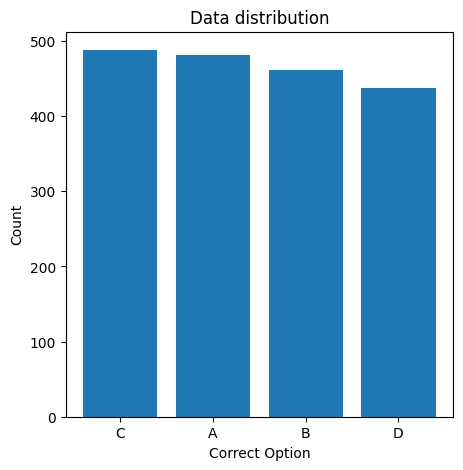

In [21]:
labels = list(distribution.keys())
values = list(distribution.values())

plt.figure(figsize=(5, 5))
plt.bar(labels, values)
plt.title('Data distribution')
plt.xlabel('Correct Option')
plt.ylabel('Count')

### Text preprocessing

In [24]:
ques_text = []
for x in range(5):    
    ques_text.append(data['QuestionText'][x])

In [25]:
ques_text

['\\[\n3 \\times 2+4-5\n\\]\nWhere do the brackets need to go to make the answer equal \\( 13 \\) ?',
 'Simplify the following, if possible: \\( \\frac{m^{2}+2 m-3}{m-3} \\)',
 "Tom and Katie are discussing the \\( 5 \\) plants with these heights:\n\\( 24 \\mathrm{~cm}, 17 \\mathrm{~cm}, 42 \\mathrm{~cm}, 26 \\mathrm{~cm}, 13 \\mathrm{~cm} \\)\nTom says if all the plants were cut in half, the range wouldn't change.\nKatie says if all the plants grew by \\( 3 \\mathrm{~cm} \\) each, the range wouldn't change.\nWho do you agree with?",
 'The angles highlighted on this rectangle with different length sides can never be... ![A rectangle with the diagonals drawn in. The angle on the right hand side at the centre is highlighted in red and the angle at the bottom at the centre is highlighted in yellow.]()',
 'The equation \\( f=3 r^{2}+3 \\) is used to find values in the table below. What is the value covered by the star? \\begin{tabular}{|c|c|c|c|c|}\n\\hline\\( r \\) & \\( 1 \\) & \\( 2 \\)

In [31]:
plain_text = []
for latex in ques_text:
    text = LatexNodes2Text().latex_to_text(latex)
    plain_text.append(text)
    print(text,'\n')


    3 × 2+4-5

Where do the brackets need to go to make the answer equal 13 ? 

Simplify the following, if possible: m^2+2 m-3/m-3 

Tom and Katie are discussing the 5 plants with these heights:
24  cm, 17  cm, 42  cm, 26  cm, 13  cm
Tom says if all the plants were cut in half, the range wouldn't change.
Katie says if all the plants grew by 3  cm each, the range wouldn't change.
Who do you agree with? 

The angles highlighted on this rectangle with different length sides can never be... ![A rectangle with the diagonals drawn in. The angle on the right hand side at the centre is highlighted in red and the angle at the bottom at the centre is highlighted in yellow.]() 

The equation f=3 r^2+3 is used to find values in the table below. What is the value covered by the star? 
r     1     2     3     4 

f     6     15          

 



In [32]:
plain_text

['\n    3 × 2+4-5\n\nWhere do the brackets need to go to make the answer equal 13 ?',
 'Simplify the following, if possible: m^2+2 m-3/m-3',
 "Tom and Katie are discussing the 5 plants with these heights:\n24 \xa0cm, 17 \xa0cm, 42 \xa0cm, 26 \xa0cm, 13 \xa0cm\nTom says if all the plants were cut in half, the range wouldn't change.\nKatie says if all the plants grew by 3 \xa0cm each, the range wouldn't change.\nWho do you agree with?",
 'The angles highlighted on this rectangle with different length sides can never be... ![A rectangle with the diagonals drawn in. The angle on the right hand side at the centre is highlighted in red and the angle at the bottom at the centre is highlighted in yellow.]()',
 'The equation f=3 r^2+3 is used to find values in the table below. What is the value covered by the star? \nr     1     2     3     4 \n\nf     6     15          \n\n']